In [24]:
# importing useful libs on the go
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import KFold

from sklearn import cross_validation
from sklearn import tree
from sklearn import svm , cross_validation
from sklearn.svm import SVR
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
plt.style.use('fivethirtyeight') # Good looking plots
pd.set_option('display.max_columns', None) # Display any number of columns

% matplotlib inline

In [25]:
# load test data
data = pd.read_csv("Training_Dataset.csv")

In [26]:
#summary
data.head()

,citizen_id,party_voted_past,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,mvar11,mvar12,mvar13,mvar14,mvar15,mvar16,mvar17,mvar18,mvar19,mvar20,mvar21,mvar22,mvar23,mvar24,mvar25,mvar26,mvar27,mvar28,mvar29,mvar30,mvar31,mvar32,mvar33,actual_vote
0,C1,Tokugawa,0,0,18,0,0,0,0,9,0,0,0,0,3,0,0,0,0,2,0,0,0,0,15,0,0,3,25-35,1.0,0.0,Degree,6,AEC,AEC,Tokugawa
1,C2,Ebony,2,6,0,2,0,2,5,0,2,0,0,0,0,0,0,0,1,0,0,0,5,10,0,15,0,3,18-24,1.0,0.0,Masters,5,AEC,AEC,Ebony
2,C3,Cosmos,0,0,0,0,6,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,1,46-55,1.0,1.0,Masters,6,AMS,AMS,Cosmos
3,C4,Centaur,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,15,0,0,0,1,36-45,1.0,0.0,Degree,6,ACL,ANQ,Centaur
4,C5,Centaur,9,2,3,0,2,1,0,1,0,0,2,0,0,0,0,2,1,2,0,1,10,15,15,0,7,4,25-35,1.0,0.0,Primary,7,ARK,ARK,Centaur


In [27]:
data.dtypes

citizen_id           object
party_voted_past     object
mvar1                 int64
mvar2                 int64
mvar3                 int64
mvar4                 int64
mvar5                 int64
mvar6                 int64
mvar7                 int64
mvar8                 int64
mvar9                 int64
mvar10                int64
mvar11                int64
mvar12                int64
mvar13                int64
mvar14                int64
mvar15                int64
mvar16                int64
mvar17                int64
mvar18                int64
mvar19                int64
mvar20                int64
mvar21                int64
mvar22                int64
mvar23                int64
mvar24                int64
mvar25                int64
mvar26                int64
mvar27               object
mvar28              float64
mvar29              float64
mvar30               object
mvar31                int64
mvar32               object
mvar33               object
actual_vote         

In [28]:
data.isnull().sum()

citizen_id           0
party_voted_past     0
mvar1                0
mvar2                0
mvar3                0
mvar4                0
mvar5                0
mvar6                0
mvar7                0
mvar8                0
mvar9                0
mvar10               0
mvar11               0
mvar12               0
mvar13               0
mvar14               0
mvar15               0
mvar16               0
mvar17               0
mvar18               0
mvar19               0
mvar20               0
mvar21               0
mvar22               0
mvar23               0
mvar24               0
mvar25               0
mvar26               0
mvar27               0
mvar28              30
mvar29              30
mvar30              30
mvar31               0
mvar32               0
mvar33               0
actual_vote          0
dtype: int64

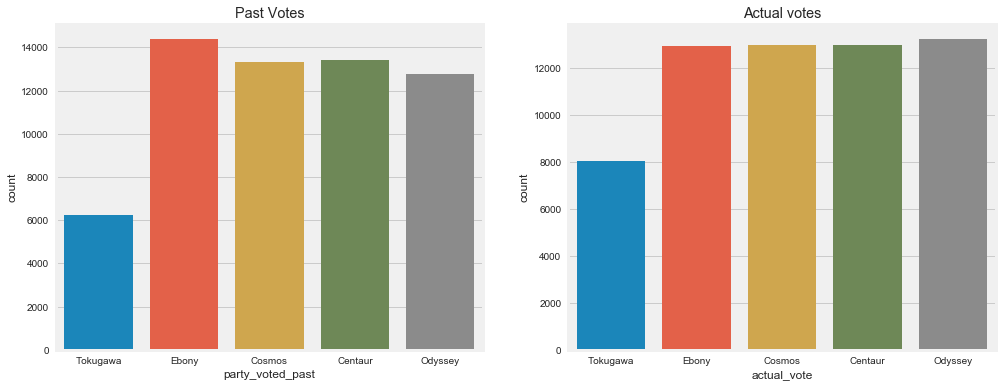

In [29]:
fig, ax = plt.subplots(figsize=(15,6))
plt.subplot(1,2,1)
plt.title("Past Votes")
sns.countplot(data=data, x="party_voted_past")
plt.subplot(1,2,2)
plt.title("Actual votes")
sns.countplot(data=data, x="actual_vote")

In [30]:
# label encoding
mod = data.copy()
label_encoder = LabelEncoder()

In [31]:
mod['party_voted_past'] = label_encoder.fit_transform(data['party_voted_past'])

In [32]:
mod['party_voted_past']

0        4
1        2
2        1
3        0
4        0
5        4
6        1
7        1
8        0
9        2
10       3
11       1
12       4
13       3
14       0
15       0
16       2
17       0
18       1
19       1
20       0
21       2
22       2
23       3
24       2
25       2
26       3
27       1
28       3
29       0
        ..
60099    3
60100    0
60101    2
60102    3
60103    1
60104    0
60105    2
60106    1
60107    0
60108    3
60109    3
60110    3
60111    1
60112    1
60113    3
60114    3
60115    0
60116    2
60117    3
60118    1
60119    3
60120    1
60121    0
60122    2
60123    4
60124    1
60125    3
60126    2
60127    3
60128    3
Name: party_voted_past, Length: 60129, dtype: int64

In [33]:
# deal with mvar27
def mvar27(val):
    try:
        a, b = val.split('-')
        return int(b) - int(a)
    except:
        return int(val.split('+')[0])


mod['mvar27'] = mod['mvar27'].apply(mvar27)

In [34]:
mod['mvar27']

0        10
1         6
2         9
3         9
4        10
5         9
6        10
7        10
8         6
9         9
10        9
11       10
12        9
13       10
14        9
15        9
16       10
17        6
18       10
19       10
20        9
21       10
22        6
23        9
24        6
25        9
26        9
27       55
28        9
29       55
         ..
60099    10
60100    55
60101     9
60102     9
60103     6
60104    55
60105     9
60106     9
60107     6
60108     9
60109    10
60110    55
60111    10
60112    55
60113    55
60114    10
60115     9
60116     9
60117    10
60118     6
60119    55
60120     9
60121     9
60122    10
60123    10
60124     9
60125     9
60126    10
60127    10
60128     6
Name: mvar27, Length: 60129, dtype: int64

In [35]:
# encode mvar30
mod['mvar30'] = label_encoder.fit_transform(data['mvar30'])

In [36]:
mod['mvar32'] = label_encoder.fit_transform(data['mvar32'])
mod['mvar33'] = label_encoder.fit_transform(data['mvar33'])

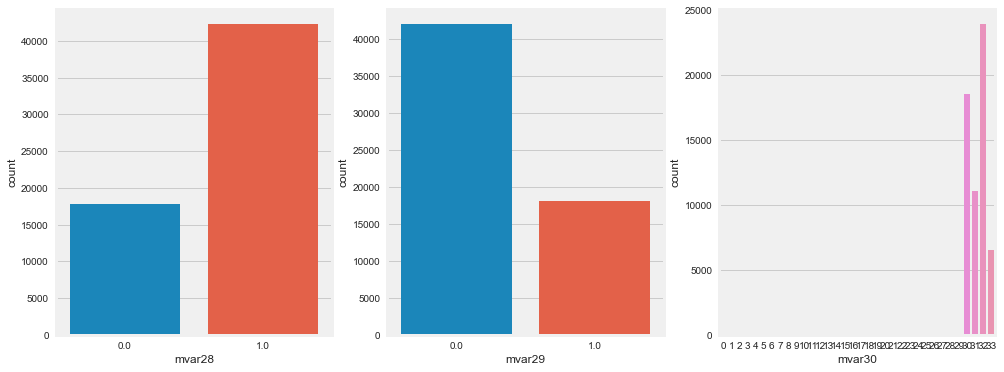

In [37]:
# imputation
fig, ax = plt.subplots(figsize=(15,6))
plt.subplot(1,3,1)
sns.countplot(data=mod, x='mvar28')
plt.subplot(1,3,2)
sns.countplot(data=mod, x='mvar29')
plt.subplot(1,3,3)
sns.countplot(data=mod, x='mvar30')

In [38]:
data['mvar30'].unique()

array(['Degree', 'Masters', 'Primary', 'Diploma', nan], dtype=object)

In [39]:
mod['mvar30'] = data['mvar30']
mod['mvar30'] = mod['mvar30'].map({"Degree":1, "Masters":2, "Primary":3, "Diploma":4})
mod['mvar30'].fillna(0, inplace=True)

In [40]:
mod['mvar28'].fillna(1.0, inplace=True)
mod['mvar29'].fillna(0.0, inplace=True)

In [41]:
#check the cleaned data
mod.isnull().sum()

citizen_id          0
party_voted_past    0
mvar1               0
mvar2               0
mvar3               0
mvar4               0
mvar5               0
mvar6               0
mvar7               0
mvar8               0
mvar9               0
mvar10              0
mvar11              0
mvar12              0
mvar13              0
mvar14              0
mvar15              0
mvar16              0
mvar17              0
mvar18              0
mvar19              0
mvar20              0
mvar21              0
mvar22              0
mvar23              0
mvar24              0
mvar25              0
mvar26              0
mvar27              0
mvar28              0
mvar29              0
mvar30              0
mvar31              0
mvar32              0
mvar33              0
actual_vote         0
dtype: int64

In [42]:
y = mod['actual_vote']
mod.drop(['citizen_id', 'actual_vote'], axis=1, inplace=True)
X = mod.as_matrix().astype(np.float)

In [43]:
#scale data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [44]:
y = label_encoder.fit_transform(y)

In [45]:
X.dtype

dtype('float64')

In [50]:
X.shape, mod.shape, data.shape

((30000, 34), (30000, 34), (60129, 36))

In [25]:
def cv(X, y, clf_class, shuffle=True, n_folds=10, **kwargs):
    k_fold = KFold(y, n_folds=n_folds, shuffle=shuffle)
    y_pred = y.copy()
    for ii, jj in k_fold:
        X_train, X_test = X[ii], X[jj]
        y_train = y[ii]
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[jj] = clf.predict(X_test)
    return y_pred

In [26]:
print('Support vector machine(SVM):   {:.2f}'.format(metrics.accuracy_score(y, cv(mod, y, svm.SVC))))
# print('Random Forest Classifier:      {:.2f}'.format(metrics.accuracy_score(y, cv(X, y, ensemble.RandomForestClassifier))))
# print('K Nearest Neighbor Classifier: {:.2f}'.format(metrics.accuracy_score(y, cv(X, y, neighbors.KNeighborsClassifier))))
# print('Logistic Regression:           {:.2f}'.format(metrics.accuracy_score(y, cv(X, y, linear_model.LogisticRegression))))

TypeError: only length-1 arrays can be converted to Python scalars

In [ ]:
#naive analysis
svm = svm.SVC()
cv = cross_val_score(svm, mod, y, cv=5, scoring="accuracy")

In [46]:
from sklearn.svm import SVR
svm = SVR(kernel='linear')
select = RFE(svm , 25 ,step=1)


In [47]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)


In [48]:


select.fit(X_train, y_train)
select.support_

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False,  True, False, False], dtype=bool)